# Overview
This notebook performs unsupervised clustering using DBSCAN to explore natural grouping patterns in the plant-health dataset. After loading and standardizing the raw features, we visualize the original class distribution and apply DBSCAN to identify clusters without using ground-truth labels. DBSCAN automatically detects dense regions and separates noise points, allowing us to examine structure in the data that may not align perfectly with predefined categories. This analysis helps reveal hidden patterns and assess how well the dataset naturally separates into distinct groups.

## Setting Random Seeds
Ensures that any randomness in preprocessing or clustering is reproducible.
This allows consistent results when rerunning the notebook.

In [1]:
import numpy as np
import random

seed = 42
random.seed(seed)
np.random.seed(seed)

# Loading & Preprocessing Data
Here, we load the plant-health dataset and perform basic preprocessing steps required before clustering.
We:
- Reads the CSV file.
- Removes non-informative columns (`Timestamp`, `Plant_ID`).
- Splits data into features (`X`) and labels (`y`).
- Fills missing values (if any) using column means.
- Encodes the target variable using `LabelEncoder` (for visualization).
- Standardizes numerical features using `StandardScaler` and returns both raw and scaled versions.

DBSCAN is sensitive to feature scales.
Standardization ensures all features contribute equally to distance calculations.

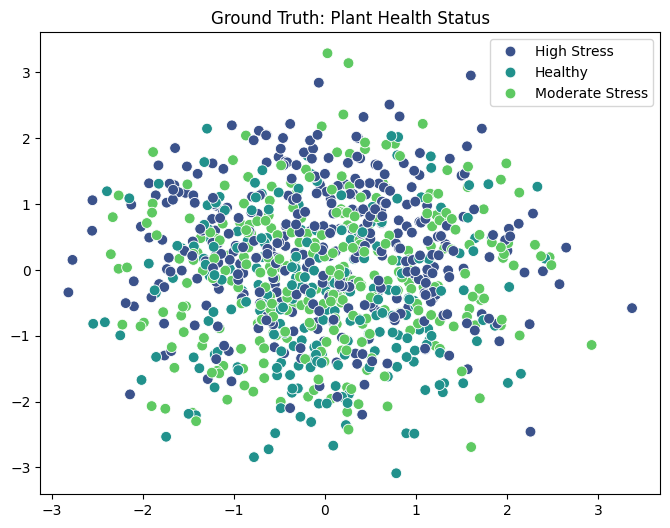

In [2]:
import os

from sklearn.preprocessing import StandardScaler

from aki.core.preprocessing import load_and_preprocess_data
from aki.core.clustering import perform_clustering
from aki.core.visualization import visualize_ground_truth
from aki.utils import find_project_root

PROJECT_ROOT = find_project_root()

train_path = os.path.join(PROJECT_ROOT, "data", "train_data.csv")
test_path = os.path.join(PROJECT_ROOT, "data", "test_data.csv")

X_train_raw, X_test_raw, y_train, y_test, X_train_scaled, X_test_scaled, label_encoder, scaler = (
    load_and_preprocess_data(
        train_path,
        test_path
    )
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_raw)

visualize_ground_truth(X_scaled, y_train, label_encoder)

## Clustering
We run DBSCAN clustering to identify natural groupings in the dataset without using labels.
The `perform_clustering` function does:
- Searches for the best eps and min_samples using silhouette score.
- Runs DBSCAN using optimal parameters.
- Computes number of clusters and silhouette score.
- Reduces data to 2D using PCA for visualization.
- Plot the resulting clusters, highlighting noise points.

This allows us to:
- Discover natural groups of plant-health conditions
- Evaluate whether the dataset is well-separated or overlapping
- Help identify noise/outlier points
- Compare natural clusters against known ground-truth health categories

eps=1.8714285714285717, min_samples=3 -> clusters=9, silhouette=-0.2493
eps=2.028571428571429, min_samples=3 -> clusters=31, silhouette=-0.2571
eps=2.028571428571429, min_samples=4 -> clusters=2, silhouette=-0.1624
eps=2.185714285714286, min_samples=3 -> clusters=44, silhouette=-0.1970
eps=2.185714285714286, min_samples=4 -> clusters=24, silhouette=-0.2212
eps=2.185714285714286, min_samples=5 -> clusters=11, silhouette=-0.2226
eps=2.185714285714286, min_samples=6 -> clusters=3, silhouette=-0.1699
eps=2.342857142857143, min_samples=3 -> clusters=25, silhouette=-0.1974
eps=2.342857142857143, min_samples=4 -> clusters=23, silhouette=-0.2120
eps=2.342857142857143, min_samples=5 -> clusters=20, silhouette=-0.2078
eps=2.342857142857143, min_samples=6 -> clusters=13, silhouette=-0.1862
eps=2.342857142857143, min_samples=7 -> clusters=7, silhouette=-0.1604
eps=2.342857142857143, min_samples=8 -> clusters=5, silhouette=-0.1630
eps=2.342857142857143, min_samples=9 -> clusters=3, silhouette=-0.14

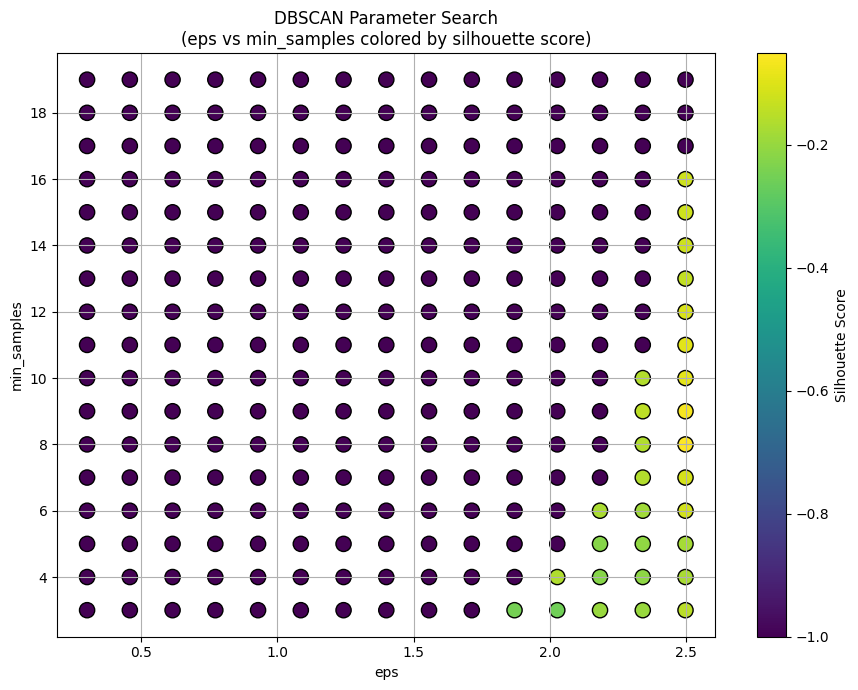

[Clustering] Using best parameters: eps=2.5, min_samples=8
[Clustering] DBSCAN found 2 clusters.
[Clustering] Silhouette Score: -0.050617037620468354


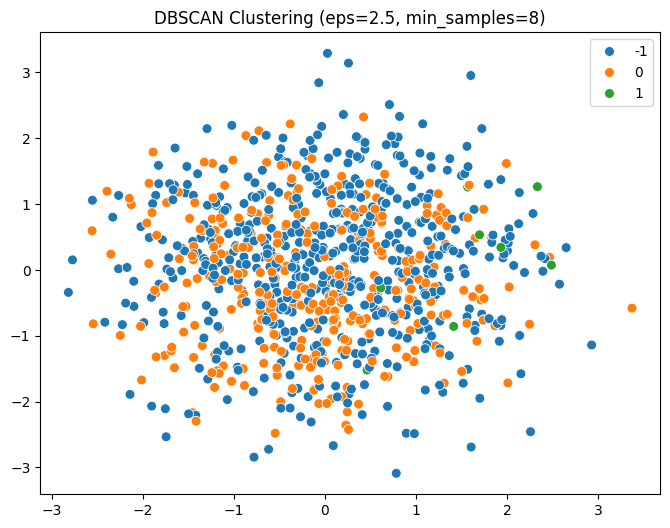

In [3]:
perform_clustering(X_scaled)